In [1]:
from google.colab import files
uploaded = files.upload()

Saving spotify_df_5.csv to spotify_df_5.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['spotify_df_5.csv']))
df

,artist_name,track_name,track_id,artist_href,track_href,genre_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,yiruma,river flows in you,64rL48E6xWMIXdpcFDEiB8,https://open.spotify.com/artist/0fauHpmSHwodVY...,https://open.spotify.com/track/64rL48E6xWMIXdp...,classical,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.943000,0.0802,0.1160,145.277,188787
1,dragonforce,through the fire and flames,6nnacTL5on2aVsRhVDNUSo,https://open.spotify.com/artist/2pH3wEn4eYlMMI...,https://open.spotify.com/track/6nnacTL5on2aVsR...,classical,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.007180,0.3340,0.1390,200.024,441560
2,johann sebastian bach,"cello suite no. 1 in g major, bwv 1007: i. pré...",61dYvvfIRtIDFuqZypPAta,https://open.spotify.com/artist/5aIqB5nVVvmFsv...,https://open.spotify.com/track/61dYvvfIRtIDFuq...,classical,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.867000,0.0762,0.3070,75.020,151480
3,camille saint-saëns,"the carnival of the animals, r. 125: xiii. the...",0jOnZhF75V68VsBObWx2XO,https://open.spotify.com/artist/436sYg6CZhNefQ...,https://open.spotify.com/track/0jOnZhF75V68VsB...,classical,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.860000,0.0805,0.0573,128.143,174267
4,ludwig van beethoven,"sonata no. 14 ""moonlight"" in c-sharp minor"", o...",3DNRdudZ2SstnDCVKFdXxG,https://open.spotify.com/artist/2wOqMjp9TyABvt...,https://open.spotify.com/track/3DNRdudZ2SstnDC...,classical,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.887000,0.1730,0.1510,170.612,315427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11262,whethan,superlove (feat. oh wonder),0lchLc0vSyRRqKSPIkFtJI,https://open.spotify.com/artist/0vqJkZ0RpLZixt...,https://open.spotify.com/track/0lchLc0vSyRRqKS...,rock,0.578,0.49100,11,-8.544,0,0.2100,0.20300,0.000378,0.1820,0.6400,98.273,184814
11263,my chemical romance,the ghost of you,1yKAqZoi8xWGLCf5vajroL,https://open.spotify.com/artist/7FBcuc1gsnv6Y1...,https://open.spotify.com/track/1yKAqZoi8xWGLCf...,rock,0.202,0.88600,11,-3.805,0,0.0816,0.02860,0.000000,0.6430,0.1920,145.781,194253
11264,maroon 5,cold (feat. future),7gwLQ4tZ5UdZ7qNcDyJ8wr,https://open.spotify.com/artist/04gDigrS5kc9YW...,https://open.spotify.com/track/7gwLQ4tZ5UdZ7qN...,rock,0.693,0.71700,9,-6.346,0,0.1070,0.14000,0.000000,0.0464,0.4120,99.836,234308
11265,the beatles,oh! darling - remastered 2009,2mxByJWOajjiVsLWjNXvDJ,https://open.spotify.com/artist/3WrFJ7ztbogyGn...,https://open.spotify.com/track/2mxByJWOajjiVsL...,rock,0.422,0.65600,4,-8.412,1,0.0397,0.01260,0.027900,0.2680,0.5490,173.930,207240


In [3]:
target = df["genre_name"]
target_names = target.unique().tolist()
target_names

['classical', 'country', 'folk', 'hip hop', 'jazz', 'pop', 'rock']

In [4]:
data = df.drop(["artist_name", "track_name", "track_id", "artist_href", "track_href", "genre_name"], axis=1)
feature_names = data.columns
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.314,0.22000,9,-21.343,1,0.0514,0.98700,0.94300,0.0802,0.1160,145.277,188787
1,0.113,0.95100,0,-4.743,0,0.1290,0.00176,0.00718,0.3340,0.1390,200.024,441560
2,0.257,0.10900,7,-21.356,1,0.0597,0.90000,0.86700,0.0762,0.3070,75.020,151480
3,0.169,0.01610,9,-31.034,0,0.0442,0.98600,0.86000,0.0805,0.0573,128.143,174267
4,0.184,0.00527,1,-37.264,0,0.0432,0.99500,0.88700,0.1730,0.1510,170.612,315427


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.25,random_state=0)

In [7]:
data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
dtype: object

In [8]:
data.iloc[:, 1:]

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.22000,9,-21.343,1,0.0514,0.98700,0.943000,0.0802,0.1160,145.277,188787
1,0.95100,0,-4.743,0,0.1290,0.00176,0.007180,0.3340,0.1390,200.024,441560
2,0.10900,7,-21.356,1,0.0597,0.90000,0.867000,0.0762,0.3070,75.020,151480
3,0.01610,9,-31.034,0,0.0442,0.98600,0.860000,0.0805,0.0573,128.143,174267
4,0.00527,1,-37.264,0,0.0432,0.99500,0.887000,0.1730,0.1510,170.612,315427
...,...,...,...,...,...,...,...,...,...,...,...
11262,0.49100,11,-8.544,0,0.2100,0.20300,0.000378,0.1820,0.6400,98.273,184814
11263,0.88600,11,-3.805,0,0.0816,0.02860,0.000000,0.6430,0.1920,145.781,194253
11264,0.71700,9,-6.346,0,0.1070,0.14000,0.000000,0.0464,0.4120,99.836,234308
11265,0.65600,4,-8.412,1,0.0397,0.01260,0.027900,0.2680,0.5490,173.930,207240


In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)
y_pred=logistic_regression.predict(X_test_scaled)

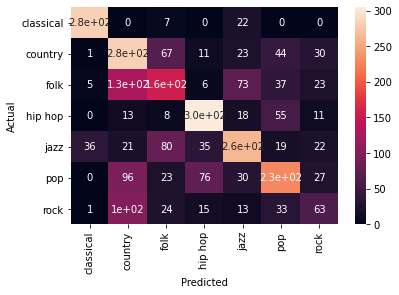

In [14]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [23]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.561945331913383


In [24]:
import pickle
# save the model to disk
filename = 'niama_audio_model.save'
pickle.dump(logistic_regression, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_pred)
print(result)